In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [50]:
stock = pd.read_csv('data.csv')

In [51]:
stock.head()

,Date,Open,High,Low,Close,Volume
0,2010-09-13,15400,15519,15320,15400,234851
1,2010-09-14,15500,15620,15200,15200,371530
2,2010-09-15,15260,15340,15020,15140,389289
3,2010-09-16,15080,15260,15080,15140,234815
4,2010-09-17,15240,15560,15159,15460,447649


In [4]:
# Compute for percentage change for better insights 

In [5]:
stock['Percentage Change'] = stock['Close'].pct_change(periods = 1)

In [6]:
stock

,Date,Open,High,Low,Close,Volume,Percentage Change
0,2010-09-13,15400,15519,15320,15400,234851,NaN
1,2010-09-14,15500,15620,15200,15200,371530,-0.012987
2,2010-09-15,15260,15340,15020,15140,389289,-0.003947
3,2010-09-16,15080,15260,15080,15140,234815,0.000000
4,2010-09-17,15240,15560,15159,15460,447649,0.021136
...,...,...,...,...,...,...,...
1623,2017-04-06,42000,42080,41600,41840,193668,-0.007119
1624,2017-04-07,41800,41820,41160,41600,200420,-0.005736
1625,2017-04-10,41940,41940,41500,41940,142827,0.008173
1626,2017-04-11,41940,41940,41580,41600,143458,-0.008107


In [7]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1628 entries, 0 to 1627
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               1628 non-null   object 
 1   Open               1628 non-null   int64  
 2   High               1628 non-null   int64  
 3   Low                1628 non-null   int64  
 4   Close              1628 non-null   int64  
 5   Volume             1628 non-null   int64  
 6   Percentage Change  1627 non-null   float64
dtypes: float64(1), int64(5), object(1)
memory usage: 89.2+ KB


In [10]:
# It seems that the Dtype for date is object, we need to convert it to datetime objects for ease of visualizing

In [11]:
stock['Date'] = pd.to_datetime(stock['Date'])

In [12]:
# It would be interesting to visualize Tesla's stock price and see what is the overal trend

Text(0.5, 1.0, 'Time Series of Tsla')

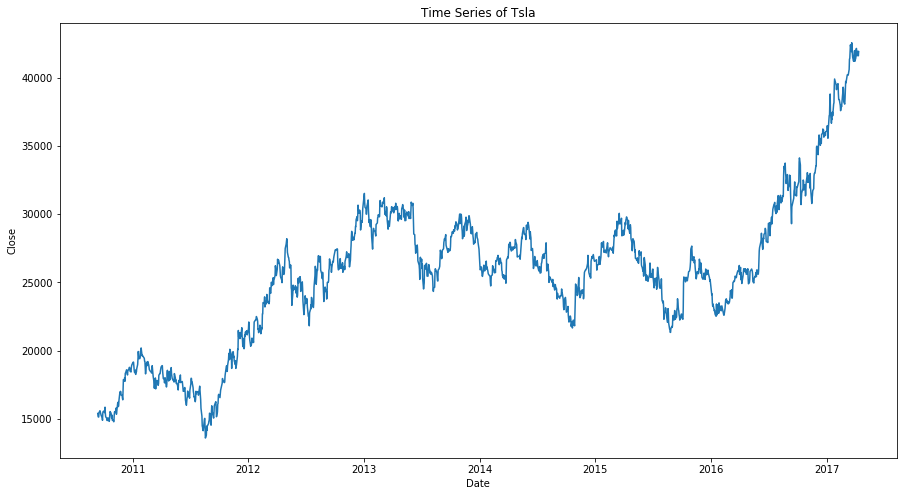

In [13]:
plt.figure(figsize = (15,8))
sns.lineplot(x = 'Date', y = 'Close', data = stock)
plt.title('Time Series of Tsla')

Text(0.5, 1.0, 'Time Series of Tsla')

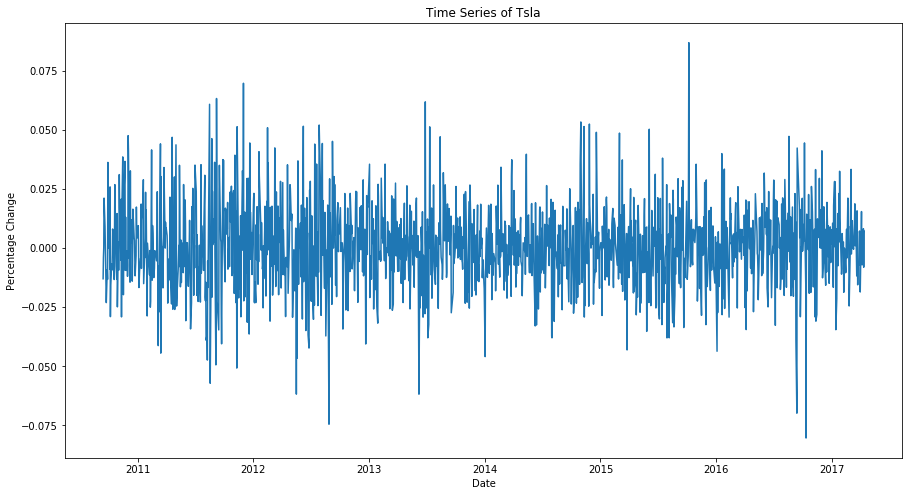

In [14]:
plt.figure(figsize = (15,8))
sns.lineplot(x = 'Date', y = 'Percentage Change', data = stock)
plt.title('Time Series of Tsla')

In [15]:
# Given the clear trend, it looks like the stock['Close'] is non-stationary
# However, the percentage change looks stationary 

In [16]:
# Employing the Dickey-Fuller Test to double check

In [17]:
import statsmodels.api as sm

/Users/simon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


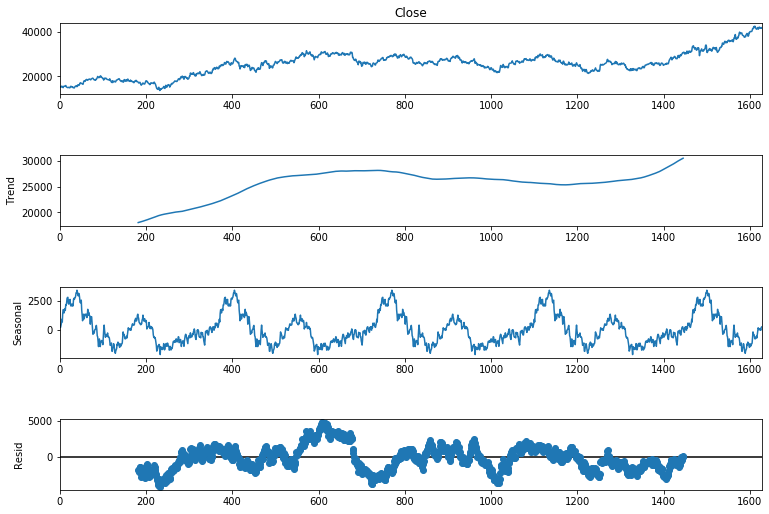

In [18]:
res = sm.tsa.seasonal_decompose(stock['Close'],freq=365)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(12)
plt.show()

In [19]:
from statsmodels.tsa.stattools import adfuller
res = sm.tsa.adfuller(stock['Close'],regression='ct')
res[1]
#non stationary

0.8682143460486949

/Users/simon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


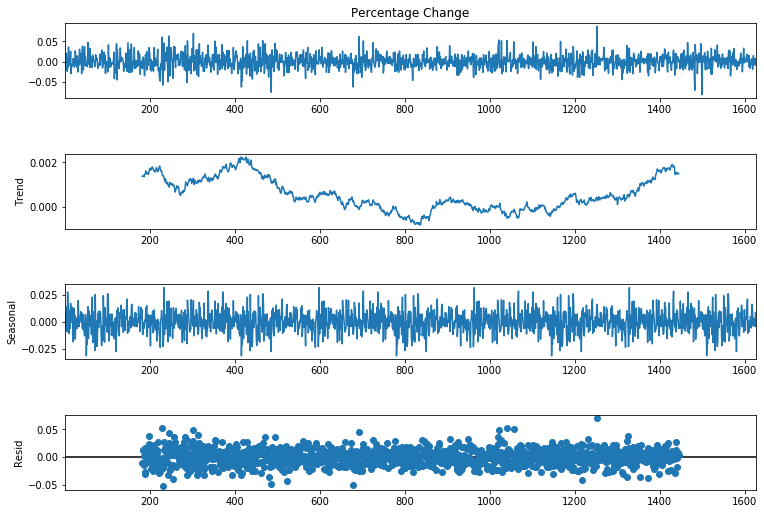

In [20]:
res = sm.tsa.seasonal_decompose(stock['Percentage Change'][1:],freq=365)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(12)
plt.show()

In [21]:
from statsmodels.tsa.stattools import adfuller
res = sm.tsa.adfuller(stock['Percentage Change'][1:],regression='ct')
res[1]
# Stationary 

0.0

In [22]:
# Ill use percentage change to make the prediction

In [23]:
# Taking a look at acf and pacf to determine p and q

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

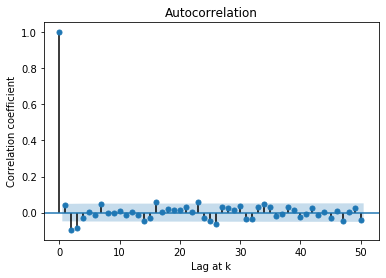

In [25]:
plot_acf(stock['Percentage Change'][1:], lags=50)
plt.xlabel("Lag at k")
plt.ylabel("Correlation coefficient")
plt.show()

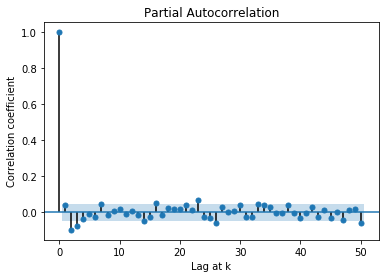

In [26]:
plot_pacf(stock['Percentage Change'][1:], lags=50)
plt.xlabel("Lag at k")
plt.ylabel("Correlation coefficient")
plt.show()

In [27]:
# It seems that for both the lag is around 2

In [28]:
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA

In [29]:
arima = sm.tsa.statespace.SARIMAX(stock['Percentage Change'][1:],order=(2,2,1),seasonal_order=(1,0,1,7),
                                 enforce_stationarity=False, enforce_invertibility=False,).fit()
arima.summary()

/Users/simon/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                 Percentage Change   No. Observations:                 1627
Model:             SARIMAX(2, 2, 1)x(1, 0, 1, 7)   Log Likelihood                3973.223
Date:                           Sun, 03 Oct 2021   AIC                          -7934.445
Time:                                   09:35:32   BIC                          -7902.119
Sample:                                        0   HQIC                         -7922.448
                                          - 1627                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5655      0.021    -27.169      0.000      -0.606      -0.525
ar.L2         -0.3192      0.022    -14.575      0.000      -0.362      -0.276
ma.L1         -1.0000      3.572     -0.280      0.780      -8.001       6.001
ar.S.L7       -0.1783      0.263     -0.677      0.498      -0.694       0.338
ma.S.L7        0.2440      0.259      0.941      0.347      -0.264       0.752
sigma2         0.0004      0.002      0.280      0.780      -0.003       0.003
===================================================================================
Ljung-Box (Q):                      256.15   Jarque-Bera (JB):                62.10
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.72   Skew:                             0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
# Creating training and testing set for predictions

In [31]:
X = stock['Close'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

In [32]:
# Use ARIMA model to make the prediction

In [33]:
pred = arima.predict(start = 0, end = 1088)

In [34]:
pred

1       0.000000
2      -0.019197
3      -0.000649
4       0.002761
5       0.034177
          ...   
1085   -0.009008
1086   -0.002240
1087    0.001020
1088   -0.000934
1089   -0.003894
Length: 1089, dtype: float64

In [35]:
# Prediction is on percentage change, convert it back to Closing price

In [36]:
predicted_close = []
curr_close = 41900
pctchange = pred
for i in range(2,1088):
    predicted_close.append((pctchange[i]/100+1)*curr_close)
    curr_close=predicted_close[-1]
predicted_close

[41891.956507391966,
 41891.684611048695,
 41892.841098640085,
 41907.15879499815,
 41911.46408472649,
 41897.52127150204,
 41891.480280956304,
 41881.70082023315,
 41907.47774739253,
 41895.93690967311,
 41900.180325798676,
 41901.65626816794,
 41896.78329425924,
 41901.24874521418,
 41889.941198318564,
 41884.9572209323,
 41876.6147392242,
 41870.39758846513,
 41866.04598746767,
 41865.83376454911,
 41865.82450053821,
 41866.885302206116,
 41863.716883457644,
 41862.19030032099,
 41866.136022750914,
 41873.21990503076,
 41876.683431702906,
 41875.37597182261,
 41869.33750027731,
 41869.15527623363,
 41864.32631630683,
 41863.73674409321,
 41857.49652419292,
 41855.85789864545,
 41859.96431829799,
 41867.251302298944,
 41872.81164782573,
 41874.30043544759,
 41877.503067751764,
 41873.58828826713,
 41876.7165504638,
 41881.6874444129,
 41887.72061508774,
 41888.91322896781,
 41888.35069058924,
 41889.509909325556,
 41900.11229239618,
 41905.933521423016,
 41911.89548591914,
 41909.561

In [37]:
subm = pd.read_csv('sample_submission.csv')
subm

,Date,Predicted
0,2017-04-13,0
1,2017-04-14,0
2,2017-04-17,0
3,2017-04-18,0
4,2017-04-19,0
...,...,...
1081,2021-09-07,0
1082,2021-09-08,0
1083,2021-09-09,0
1084,2021-09-10,0


In [38]:
subm['Predicted'] = predicted_close

In [39]:
subm

,Date,Predicted
0,2017-04-13,41891.956507
1,2017-04-14,41891.684611
2,2017-04-17,41892.841099
3,2017-04-18,41907.158795
4,2017-04-19,41911.464085
...,...,...
1081,2021-09-07,42155.127327
1082,2021-09-08,42152.356642
1083,2021-09-09,42148.559442
1084,2021-09-10,42147.615312


In [40]:
subm.to_csv("pred2.csv", index=False)

In [41]:
# Double check with auto arima, to find out the optimal lag

In [42]:
!pip install pmdarima
import pmdarima as pm
from pmdarima.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [43]:
data=pd.read_csv("data.csv")
subm=pd.read_csv("sample_submission.csv")

In [44]:
train=np.array(data['Close'])

In [45]:
model=pm.auto_arima(train, seasonal=True, m=7)
forecasts=model.predict(1086)

In [52]:
model

ARIMA(maxiter=50, method='lbfgs', order=(2, 1, 1), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(1, 0, 1, 7),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [53]:
subm['Predicted']=forecasts
subm.to_csv("pred3.csv", index=False)

In [55]:
#ANN

In [59]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [60]:
training = stock['Close'].values.reshape(-1,1) #create training sets

In [61]:
scalar = MinMaxScaler()

In [62]:
#scale the data

In [63]:
tr_sc = scalar.fit_transform(training)

In [64]:
tr_sc

array([[0.0621547 ],
       [0.05524862],
       [0.0531768 ],
       ...,
       [0.97859116],
       [0.96685083],
       [0.97720994]])

In [65]:
# split x_train, y_train

In [66]:
x_train = []
y_train = []
days = 150

In [67]:
for i in range(days, len(tr_sc)):
    x_train.append(tr_sc[i-days:i,0])
    y_train.append(tr_sc[i,0])

In [69]:
#reshaping

In [70]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [71]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [72]:
# define model
model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [73]:
from keras.callbacks import EarlyStopping
stop = EarlyStopping(monitor='loss',min_delta=0.000000000001,patience=30) 

In [74]:
model.fit(x_train, y_train, epochs = 100, batch_size = 32, callbacks = [stop])

Epoch 1/100
47/47 [==============================] - 26s 7ms/step - loss: 0.2120
Epoch 2/100
47/47 [==============================] - 0s 6ms/step - loss: 0.1206
Epoch 3/100
47/47 [==============================] - 0s 6ms/step - loss: 0.0968
Epoch 4/100
47/47 [==============================] - 0s 5ms/step - loss: 0.0799
Epoch 5/100
47/47 [==============================] - 0s 6ms/step - loss: 0.0711
Epoch 6/100
47/47 [==============================] - 0s 5ms/step - loss: 0.0595
Epoch 7/100
47/47 [==============================] - 0s 7ms/step - loss: 0.0539
Epoch 8/100
47/47 [==============================] - 0s 7ms/step - loss: 0.0504
Epoch 9/100
47/47 [==============================] - 0s 11ms/step - loss: 0.0472
Epoch 10/100
47/47 [==============================] - 0s 10ms/step - loss: 0.0457
Epoch 11/100
47/47 [==============================] - 0s 7ms/step - loss: 0.0371
Epoch 12/100
47/47 [==============================] - 0s 6ms/step - loss: 0.0373
Epoch 13/100
47/47 [==============

In [76]:
# get the prediction based on previous 150 days and use the prediction as a basis for
# the next predictions

In [75]:
pre=[]
store = x_train[-1:]
for i in range(1086):
    pre.append(model.predict(store)[0][0]) # get the predictions
    a=np.append(store[0][1:],pre[-1]) # add in prediction, kickout last number 
    store=np.reshape(a, (store.shape[0], store.shape[1], 1))
    
price_preds=[]
for i in pre:
    price_preds.append(scalar.inverse_transform(i.reshape(1,-1))[0][0]) # how do you determine the reshaping
price_preds

[27637.098,
 27750.441,
 28216.414,
 27939.35,
 28166.037,
 27360.031,
 26084.236,
 26763.898,
 27145.936,
 27485.97,
 27574.127,
 27901.568,
 27309.654,
 27271.875,
 27284.467,
 27259.281,
 27674.877,
 27649.69,
 27851.191,
 27914.162,
 28836.39,
 29032.965,
 28693.445,
 26985.129,
 26862.223,
 27133.342,
 27385.219,
 27548.94,
 27536.346,
 27989.725,
 27926.756,
 27536.346,
 27775.629,
 27637.098,
 27259.281,
 27334.844,
 27851.191,
 28166.037,
 28329.76,
 28216.414,
 27876.379,
 28014.912,
 28178.633,
 28229.008,
 27624.504,
 28291.977,
 27649.69,
 27083.453,
 26911.385,
 27145.936,
 27271.875,
 27498.562,
 27586.72,
 28178.633,
 28291.977,
 28304.572,
 28304.572,
 28654.46,
 28654.46,
 29558.049,
 29588.17,
 29308.635,
 29190.49,
 29578.338,
 29814.348,
 29992.621,
 29893.02,
 29617.67,
 29755.344,
 29863.52,
 29686.51,
 30022.688,
 30042.729,
 30213.096,
 30142.945,
 30183.03,
 29912.688,
 30072.795,
 30082.816,
 29972.578,
 30112.879,
 30142.945,
 30333.354,
 30173.008,
 29873.35

In [77]:
subm['Predicted'] = price_preds

In [78]:
subm

,Date,Predicted
0,2017-04-13,27637.097656
1,2017-04-14,27750.441406
2,2017-04-17,28216.414062
3,2017-04-18,27939.349609
4,2017-04-19,28166.037109
...,...,...
1081,2021-09-07,25863.679688
1082,2021-09-08,25863.679688
1083,2021-09-09,25863.679688
1084,2021-09-10,25863.679688


In [79]:
subm.to_csv("pred3.csv", index=False)

In [ ]:
#RNN

In [81]:
from tensorflow.keras.layers import LSTM

In [82]:
# Initialising RNN
regressor = Sequential()

# Adding the LSTM layers and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.5))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.5))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.5))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.5))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.5))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.5))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.5))

# Adding the output layer
regressor.add(Dense(units = 1))
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
regressor.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
47/47 [==============================] - 22s 226ms/step - loss: 0.0644
Epoch 2/100
47/47 [==============================] - 11s 226ms/step - loss: 0.0132
Epoch 3/100
47/47 [==============================] - 11s 225ms/step - loss: 0.0122
Epoch 4/100
47/47 [==============================] - 10s 207ms/step - loss: 0.0095
Epoch 5/100
47/47 [==============================] - 10s 206ms/step - loss: 0.0087
Epoch 6/100
47/47 [==============================] - 10s 208ms/step - loss: 0.0085
Epoch 7/100
47/47 [==============================] - 10s 208ms/step - loss: 0.0073
Epoch 8/100
47/47 [==============================] - 10s 207ms/step - loss: 0.0092
Epoch 9/100
47/47 [==============================] - 10s 207ms/step - loss: 0.0062
Epoch 10/100
47/47 [==============================] - 10s 208ms/step - loss: 0.0066
Epoch 11/100
47/47 [==============================] - 10s 208ms/step - loss: 0.0066
Epoch 12/100
47/47 [==============================] - 10s 208ms/step - loss: 0.0063
E

In [ ]:
pre=[]
store = x_train[-1:]# why -1:
for i in range(1086):
    pre.append(regressor.predict(store)[0][0]) # get the predictions
    a=np.append(store[0][1:],pre[-1]) # add in prediction, kickout last number 
    store=np.reshape(a, (store.shape[0], store.shape[1], 1))
    
price_preds=[]
for i in pre:
    price_preds.append(scalar.inverse_transform(i.reshape(1,-1))[0][0]) # how do you determine the reshaping
price_preds

In [ ]:
subm['Predicted'] = price_preds

In [ ]:
subm.to_csv("pred4.csv", index=False)